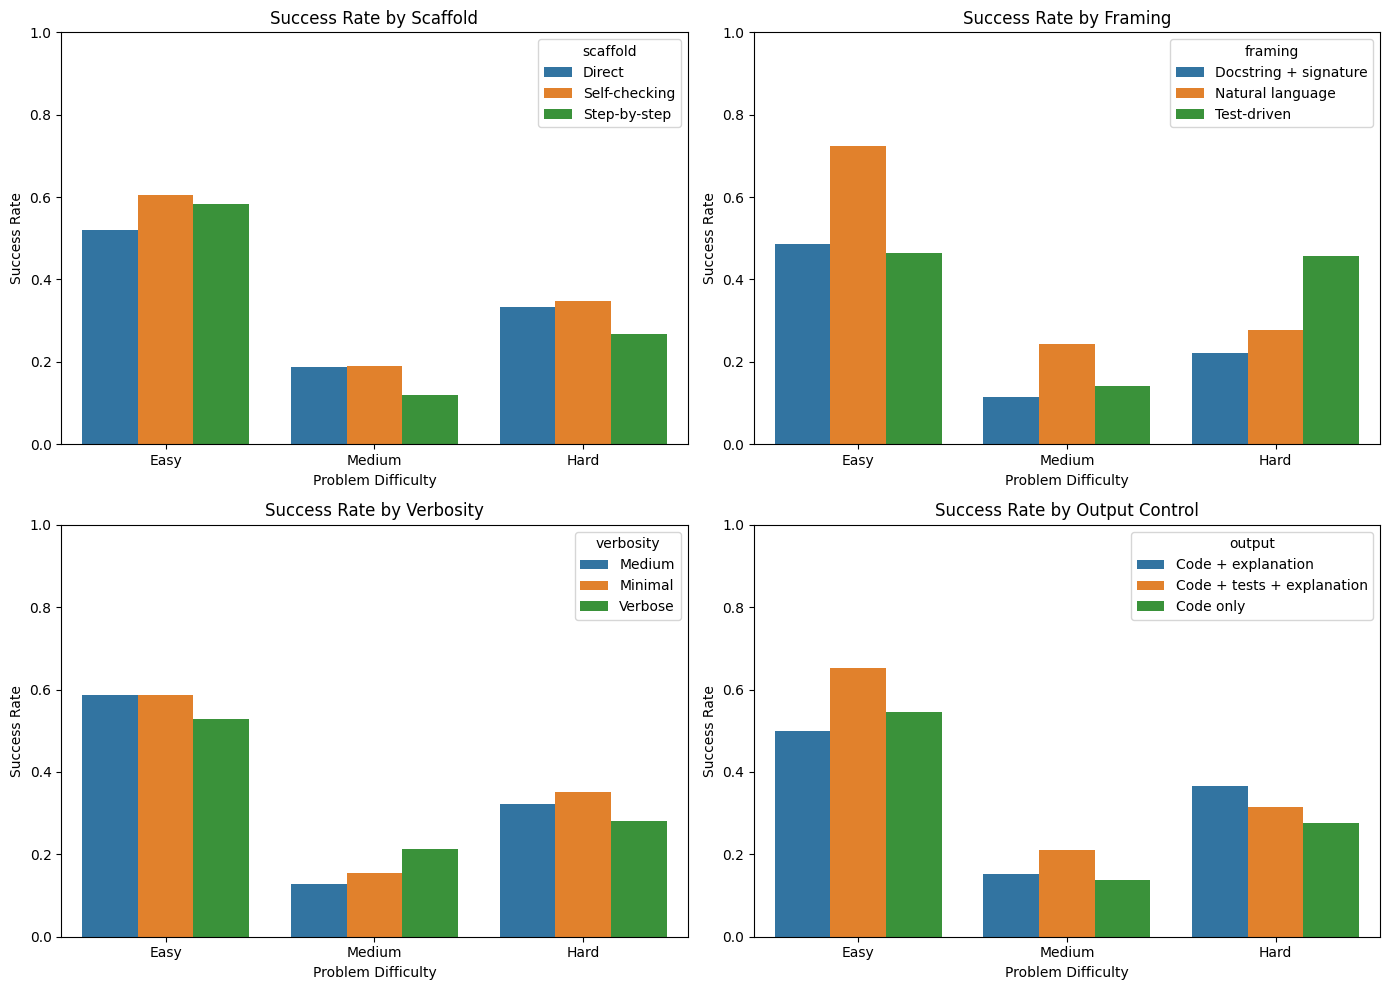

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pandas as pd

model = "qwen"
files = [f"./results/results_easy_{model}.json", 
         f"./results/results_medium_{model}.json", 
         f"./results/results_hard_{model}.json"]

all_data = []
for f in files:
    with open(f) as infile:
        all_data.extend(json.load(infile))

df = pd.DataFrame(all_data)
df = df[["problem", "framing", "scaffold", "verbosity", "output", "passed", "error"]]

# Clean problem names
df["problem"] = df["problem"].str.replace(" – .*", "", regex=True)
order = ["Easy", "Medium", "Hard"]

# Prepare subplots (2x2 grid for 4 plots)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# 1. Scaffold performance
scaffold_perf = df.groupby(["problem", "scaffold"])["passed"].mean().reset_index()
sns.barplot(data=scaffold_perf, x="problem", y="passed", hue="scaffold", order=order, ax=axes[0])
axes[0].set_title("Success Rate by Scaffold")

# 2. Framing performance
framing_perf = df.groupby(["problem", "framing"])["passed"].mean().reset_index()
sns.barplot(data=framing_perf, x="problem", y="passed", hue="framing", order=order, ax=axes[1])
axes[1].set_title("Success Rate by Framing")

# 3. Verbosity
verbosity_perf = df.groupby(["problem", "verbosity"])["passed"].mean().reset_index()
sns.barplot(data=verbosity_perf, x="problem", y="passed", hue="verbosity", order=order, ax=axes[2])
axes[2].set_title("Success Rate by Verbosity")

# 4. Output control
output_perf = df.groupby(["problem", "output"])["passed"].mean().reset_index()
sns.barplot(data=output_perf, x="problem", y="passed", hue="output", order=order, ax=axes[3])
axes[3].set_title("Success Rate by Output Control")

# Clean up axes
for ax in axes:
    ax.set_ylim(0, 1)
    ax.set_xlabel("Problem Difficulty")
    ax.set_ylabel("Success Rate")

plt.tight_layout()
plt.show()
